In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(".\datasets\Tesla.csv")
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


# EDA

In [31]:
df.shape

(1692, 7)

In [30]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

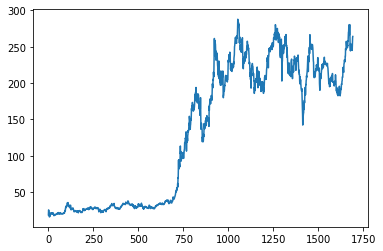

In [6]:
plt.plot(df["Open"])

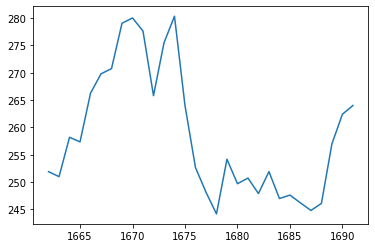

In [7]:
plt.plot(df["Open"].tail(30))

In [ ]:
# Timestamp  = 60 and  Predicting  30 values

In [8]:
training_set = df.iloc[:1662,[1]].values
print(training_set)
print(training_set.shape)

[[ 19.      ]
 [ 25.790001]
 [ 25.      ]
 ...
 [249.240005]
 [253.050003]
 [248.339996]]
(1662, 1)


In [10]:
testing_set = df.iloc[1602:,[1]].values
print(testing_set)
print(testing_set.shape)

[[193.589996]
 [193.789993]
 [186.880005]
 [191.050003]
 [184.240005]
 [188.      ]
 [182.779999]
 [182.649994]
 [183.490005]
 [190.649994]
 [185.039993]
 [185.839996]
 [190.610001]
 [193.639999]
 [195.479996]
 [195.559998]
 [191.      ]
 [188.25    ]
 [182.880005]
 [182.509995]
 [185.520004]
 [186.149994]
 [192.050003]
 [190.869995]
 [192.800003]
 [193.179993]
 [198.740005]
 [198.410004]
 [198.080002]
 [202.490005]
 [203.050003]
 [208.449997]
 [208.220001]
 [208.      ]
 [214.880005]
 [221.529999]
 [218.559998]
 [216.300003]
 [214.860001]
 [214.75    ]
 [226.419998]
 [226.929993]
 [228.970001]
 [232.      ]
 [229.070007]
 [229.059998]
 [230.      ]
 [236.699997]
 [236.649994]
 [247.25    ]
 [245.460007]
 [245.850006]
 [250.      ]
 [257.309998]
 [254.289993]
 [251.380005]
 [252.529999]
 [249.240005]
 [253.050003]
 [248.339996]
 [251.910004]
 [251.      ]
 [258.190002]
 [257.350006]
 [266.25    ]
 [269.790009]
 [270.73999 ]
 [279.029999]
 [280.      ]
 [277.600006]
 [265.799988]
 [275.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scale.fit_transform(training_set)
scaled_testing_set = scale.transform(testing_set)
print(scaled_training_set)

[[0.01053291]
 [0.03553936]
 [0.03262991]
 ...
 [0.85846866]
 [0.87250025]
 [0.85515407]]


In [12]:
x_train,y_train = [],[]

for i in range(60,1662):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
print(x_train.shape)
print(y_train.shape)

(1602, 60)
(1602, 60, 1)
(1602,)


# Training RNN model

In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
model = Sequential()

In [15]:
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 50))
model.add(Dropout(0.1))

In [16]:
model.add(Dense(units = 1))

In [17]:
model.compile(optimizer = "adam",loss = "mean_squared_error")

In [18]:
model.fit(x_train,y_train,batch_size = 32,epochs = 50)

Epoch 1/50
51/51 [==============================] - 24s 177ms/step - loss: 0.0415
Epoch 2/50
51/51 [==============================] - 9s 184ms/step - loss: 0.0055
Epoch 3/50
51/51 [==============================] - 10s 188ms/step - loss: 0.0048
Epoch 4/50
51/51 [==============================] - 8s 165ms/step - loss: 0.0050
Epoch 5/50
51/51 [==============================] - 8s 155ms/step - loss: 0.0052
Epoch 6/50
51/51 [==============================] - 10s 190ms/step - loss: 0.0040
Epoch 7/50
51/51 [==============================] - 8s 163ms/step - loss: 0.0038
Epoch 8/50
51/51 [==============================] - 9s 184ms/step - loss: 0.0035
Epoch 9/50
51/51 [==============================] - 10s 201ms/step - loss: 0.0031
Epoch 10/50
51/51 [==============================] - 9s 169ms/step - loss: 0.0031
Epoch 11/50
51/51 [==============================] - 9s 182ms/step - loss: 0.0035
Epoch 12/50
51/51 [==============================] - 9s 172ms/step - loss: 0.0037
Epoch 13/50
51/51 [==

In [19]:
x_test = []

for i in range(60,90):
    x_test.append(scaled_testing_set[i-60:i,0])

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_test.shape)
print(x_test)

(30, 60, 1)
[[[0.6535189 ]
  [0.65425546]
  [0.62880712]
  ...
  [0.85846866]
  [0.87250025]
  [0.85515407]]

 [[0.65425546]
  [0.62880712]
  [0.64416453]
  ...
  [0.87250025]
  [0.85515407]
  [0.86830182]]

 [[0.62880712]
  [0.64416453]
  [0.61908444]
  ...
  [0.85515407]
  [0.86830182]
  [0.86495042]]

 ...

 [[0.67127019]
  [0.67005485]
  [0.68629616]
  ...
  [0.84730968]
  [0.84219054]
  [0.84694137]]

 [[0.67005485]
  [0.68629616]
  [0.68835854]
  ...
  [0.84219054]
  [0.84694137]
  [0.88704743]]

 [[0.68629616]
  [0.68835854]
  [0.70824582]
  ...
  [0.84694137]
  [0.88704743]
  [0.90693471]]]


In [20]:
real_values = df.iloc[1662:,[1]].values
real_values.shape

(30, 1)

# Prediction and Visualization

In [21]:
predicted = model.predict(x_test)
predicted

array([[0.8997684 ],
       [0.89975953],
       [0.900913  ],
       [0.90776074],
       [0.9158412 ],
       [0.9286037 ],
       [0.9437837 ],
       [0.95566857],
       [0.968951  ],
       [0.9803281 ],
       [0.98418057],
       [0.97190195],
       [0.9654798 ],
       [0.97106934],
       [0.96583843],
       [0.945199  ],
       [0.9202699 ],
       [0.89801943],
       [0.89068455],
       [0.8918061 ],
       [0.8958547 ],
       [0.8967277 ],
       [0.897147  ],
       [0.893566  ],
       [0.8878938 ],
       [0.88148844],
       [0.8751195 ],
       [0.871236  ],
       [0.8784906 ],
       [0.89639646]], dtype=float32)

In [22]:
unscaled_predicted = scale.inverse_transform(predicted)
unscaled_predicted

array([[260.45413],
       [260.45172],
       [260.76492],
       [262.62427],
       [264.81836],
       [268.28378],
       [272.40558],
       [275.63272],
       [279.2393 ],
       [282.3285 ],
       [283.37457],
       [280.04053],
       [278.29672],
       [279.81448],
       [278.39413],
       [272.78992],
       [266.0209 ],
       [259.97922],
       [257.98758],
       [258.2921 ],
       [259.39142],
       [259.62848],
       [259.74234],
       [258.77   ],
       [257.2298 ],
       [255.49055],
       [253.7612 ],
       [252.70673],
       [254.67656],
       [259.53854]], dtype=float32)

In [23]:
np.concatenate((unscaled_predicted,real_values),1)

array([[260.45413208, 251.910004  ],
       [260.45172119, 251.        ],
       [260.7649231 , 258.190002  ],
       [262.62426758, 257.350006  ],
       [264.81835938, 266.25      ],
       [268.28378296, 269.790009  ],
       [272.40557861, 270.73999   ],
       [275.63272095, 279.029999  ],
       [279.23928833, 280.        ],
       [282.32849121, 277.600006  ],
       [283.37457275, 265.799988  ],
       [280.04052734, 275.450012  ],
       [278.29672241, 280.309998  ],
       [279.81448364, 264.        ],
       [278.39413452, 252.660004  ],
       [272.78991699, 248.169998  ],
       [266.02090454, 244.190002  ],
       [259.97921753, 254.179993  ],
       [257.98757935, 249.710007  ],
       [258.29211426, 250.740005  ],
       [259.39141846, 247.910004  ],
       [259.628479  , 251.919998  ],
       [259.74234009, 247.        ],
       [258.76998901, 247.630005  ],
       [257.22979736, 246.210007  ],
       [255.49055481, 244.820007  ],
       [253.76119995, 246.110001  ],
 

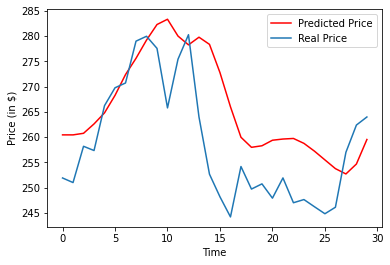

In [24]:
plt.plot(unscaled_predicted,c = "r")
plt.plot(real_values)
plt.xlabel('Time')
plt.ylabel('Price (in $)')
plt.legend(['Predicted Price','Real Price'])

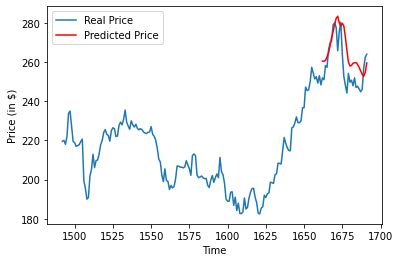

In [29]:
plt.plot(df["Open"].tail(200))
plt.plot(range(1662,1692),unscaled_predicted,c = "r")
plt.xlabel('Time')
plt.ylabel('Price (in $)')
plt.legend(['Real Price','Predicted Price',])

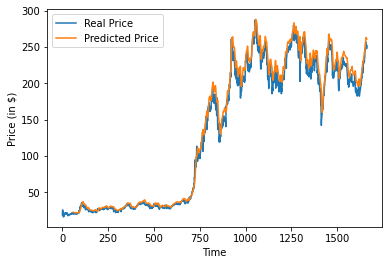

In [28]:
plt.plot(df["Open"].head(1662))
plt.plot(range(60,1662),scale.inverse_transform(model.predict(x_train)))
plt.xlabel('Time')
plt.ylabel('Price (in $)')
plt.legend(['Real Price','Predicted Price'])